<a href="https://www.kaggle.com/code/nortonperez/csci-331-digit-recognizer-notebook?scriptVersionId=155206098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# General imputs and files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import os
print("Working directory: "+ os.getcwd())
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("\t" + os.path.join(dirname, filename))

Working directory: /kaggle/working
	/kaggle/input/digit-recognizer/sample_submission.csv
	/kaggle/input/digit-recognizer/train.csv
	/kaggle/input/digit-recognizer/test.csv


<span style="font-size:18px;">
We have 3 important files that will provide help in training and testing a model
</span>

# Sample of pixel images
<span style="font-size:18px;">
The images are 28x28 pixels and range from 0 to 255, where 0 is black and 255 is white. The train data is organized so that the first column is the label (or the expected number), followed by information about the 784 pixels. There is an example below.
</span>

In [2]:
trainDataFrame = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
trainDataFrame.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


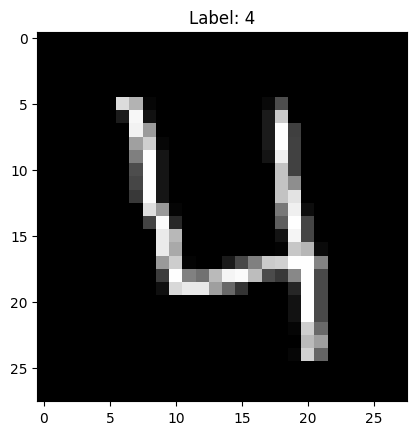

In [3]:
plt.title("Label: " + str(trainDataFrame.iloc[3,0])) 
plt.imshow(np.asarray(trainDataFrame.iloc[3,1:]).reshape(28,28), cmap="gray", vmin=0, vmax=255)

# Set up
<span style="font-size:18px;">
We will have two shared variables that will be used in both models. The first variable is the prediction target also know as y. The second variable is the features (called X) which is all the columns besides the label.
</span>

In [4]:
X = trainDataFrame.drop("label",axis=1)                   
y = trainDataFrame.label                                 # prediction target

# First model
<span style="font-size:18px;">
The first model is Random Forest.
</span>

In [5]:
from sklearn.ensemble import RandomForestClassifier

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

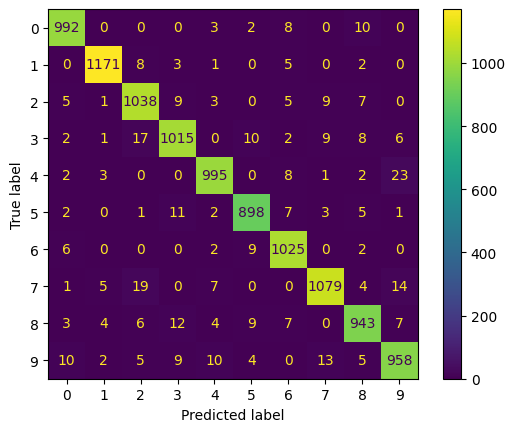

In [6]:
prediction = forest_model.predict(val_X)
matrix = confusion_matrix(val_y, prediction)

matrix_display = ConfusionMatrixDisplay(matrix).plot()

# Second model
<span style="font-size:18px;">
The second model is Logistic Regression.
</span>

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=0))])

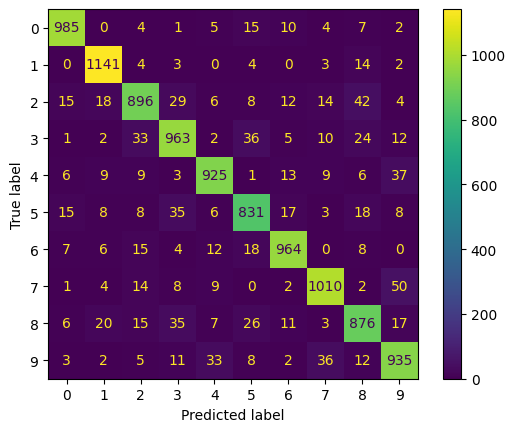

In [8]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()